Importing the Dependencies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import SCORERS, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading the file into pandas dataframe:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [4]:
#printing the first five rows of the dataset:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#printing the last five rows of the dataset:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
#checking the rows and columns of the dataset:
df.shape

(6362620, 11)

In our dataseet, there are 6362620 rows and 11 columns.

In [7]:
#checking the missing values:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we can see there is no missing values in our dataset. If we have missing values then we'll have to handle those missing values by dropping them or by replacing them with some other values like mean, median.This method is known as imputation. Here we can't drop the values as there is very less data.

In [8]:
#more information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
##getting all the statistical measures about the dataset:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


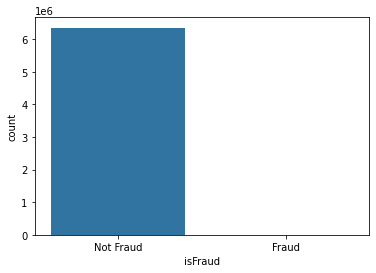

In [11]:
#plot the no. of 1's and 0's:
a = sns.countplot(df['isFraud'])
a.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

We can clearly see that this is the imbalanced data. 

* Imbalanced data is what we have when the number of observations of one class in a dataset is significantly lower than in other classes.


In [12]:
#seperating fraudelent and non fraudlent data:
df_0 = df[df['isFraud'] == 0]
df_1 = df[df['isFraud'] == 1]

In [13]:
df_0.isFraud.value_counts()

0    6354407
Name: isFraud, dtype: int64

In [14]:
df_1.isFraud.value_counts()

1    8213
Name: isFraud, dtype: int64

In [15]:
#check the number of 1s and 0s:
count = df['isFraud'].value_counts()
print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

Fraudulent "1" : 8213
Not Fraudulent "0": 6354407


**Correlation :** 

It explains how one or more variables are related to each other.

These variables can be input data features which have been used to forecast our target variable.

Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable. 

In [16]:
correlation = df.corr()

For observing the correlation on the graph we use Heat Map.

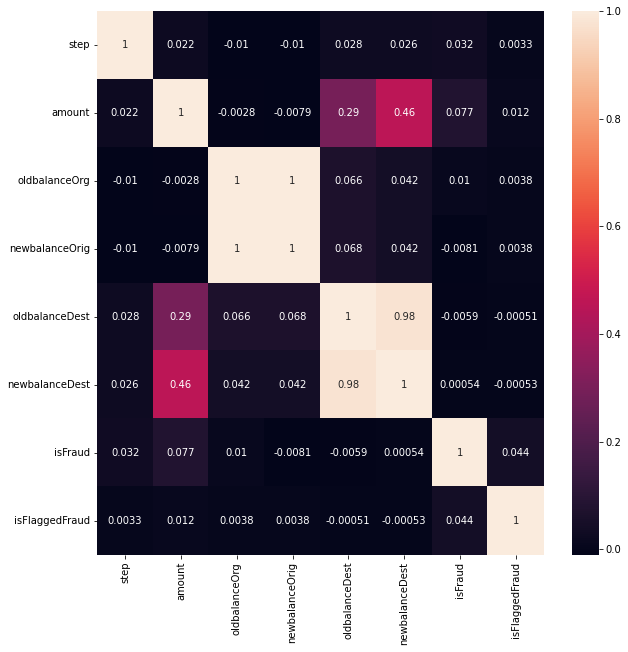

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

Separating Features and Target:

In [18]:
X = df.drop(columns = ['isFraud' , 'type', 'nameOrig', 'nameDest'], axis = 1)
#target
Y = df['isFraud']  

In [19]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [20]:
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFlaggedFraud  
0                  0.00               0  
1  

In [21]:
print(Y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


In [22]:
#list of modelS:
models = [LogisticRegression(max_iter = 1000), SVC(kernel='linear'),KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [23]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model, X, Y, cv = 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
        
    print('Cross Validation accuracies for the', model , '=', cv_score)
    print('Accuracy score of the ',model,  '=', mean_accuracy, '%')
    print('-------------------------------------------------------------------')

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.97458201 0.99929589 0.99920473 0.99906328 0.9990177 ]
Accuracy score of the  LogisticRegression(max_iter=1000) = 99.42 %
-------------------------------------------------------------------


**Train Test Split:**

*We split data into train and test data because our model will be trained on the training data and will use test data to evaluate our model.*

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

**Resampling Technique:**

*The method of resampling does not involve using generic distribution tables (for example, normal distribution tables) to compute approximate p probability values.*

In [ ]:
#isFraud count:
isFraud_count_0, isFraud_count_1 = df['isFraud'].value_counts()

isFraud_0 = df[df['isFraud'] == 0]
isFraud_1 = df[df['isFraud'] == 1]

In [ ]:
#print the shape of the class:
print('isFraud 0:', isFraud_0.shape)
print('\nisFraud 1:', isFraud_1.shape)

There are two types of resampling:

Under-sampling

Over-sampling

**Under Sampling :**

*Undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.*

In [ ]:
isFraud_0_under = isFraud_0.sample(isFraud_count_1)

test_under = pd.concat([isFraud_0_under, isFraud_1], axis=0)

print("total isFraud of 1 and 0:\n",test_under['isFraud'].value_counts())

test_under['isFraud'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

**Over Sampling:**

Oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [ ]:
isFraud_1_over = isFraud_1.sample(isFraud_count_0, replace=True)

test_under = pd.concat([isFraud_1_over, isFraud_0], axis=0)

# print the number of class count
print('isFraud count of 1 and 0:\n', test_under['isFraud'].value_counts())

# plot the count
test_under['isFraud'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

Model Training:

In [ ]:
# creating an instance of the model
model = LogisticRegression()

In [ ]:
model.fit(X, Y)

In [ ]:
Y_predict = model.predict(X)

In [ ]:
accuracy_score(Y_predict,Y)

**Confusion Matrix:**

*A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes.*

In [ ]:
#confusion matrix:
matrix = confusion_matrix(Y_predict,Y)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn:
tp, fn, fp, tn = confusion_matrix(Y_predict,Y,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy:
matrix = classification_report(Y_predict,Y,labels=[1,0])
print('Classification report : \n',matrix)